In [2]:
!pip install pandas
!pip3 install textblob
!pip3 install pandas
!pip3 install matplotlib
!pip3 install wordcloud
!pip install pycountry
!pip install plotly


In [3]:
import tweepy 
import pandas as pd

In [4]:
access_token = "1460188812508741632-OSyuHIQShLBDvvHMSh1bualm1fA0Vw"
access_token_secret = "HtzuOys5mVnkIGBCgZlUhHTugifXh7kIra6M4o4AdenIE"
consumer_key = "q1bcK4gedBeOJx4gRSHrlaAou"
consumer_secret = "eg1fiaOSvk56FxPDW0XOo05DJScJL04jCEWOs0HWzFzo1B5LhY"

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth)

In [6]:
tweets = api.user_timeline(screen_name = "elonmusk", count = 5, tweet_mode = "extended")

In [7]:
for i in tweets:
    print(i)
    print(dir(i))
    print(i.full_text)

Status(_api=<tweepy.api.API object at 0x0000021101743C40>, _json={'created_at': 'Mon Jan 17 05:00:07 +0000 2022', 'id': 1482940777726681089, 'id_str': '1482940777726681089', 'full_text': '@pervocracy 🤣👍', 'truncated': False, 'display_text_range': [12, 14], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'pervocracy', 'name': 'Cliff 🦖 Jerrison 🏳️\u200d⚧️', 'id': 245521460, 'id_str': '245521460', 'indices': [0, 11]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1482768608522649603, 'in_reply_to_status_id_str': '1482768608522649603', 'in_reply_to_user_id': 245521460, 'in_reply_to_user_id_str': '245521460', 'in_reply_to_screen_name': 'pervocracy', 'user': {'id': 44196397, 'id_str': '44196397', 'name': 'Elon Musk', 'screen_name': 'elonmusk', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 705

In [8]:
numberoftweet=200
tweetes=[]
likes=[]
time=[]


In [9]:
tweets = api.user_timeline(screen_name = "elonmusk", count = 5, tweet_mode = "extended")

for tweet in tweets:
    print(f"- {tweet.full_text}")

- @pervocracy 🤣👍
- @BillyM2k Yeah
- @NoahWebb_ We will start rolling out FSD beta in Canada cautiously in next 2 to 4 weeks
- 😅
- Good thing I never tweet anything controversial https://t.co/T7sD1q1hvd


In [10]:
import pandas as pd

df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ["tweet"])
df.head()

,tweet
0,@pervocracy 🤣👍
1,@BillyM2k Yeah
2,@NoahWebb_ We will start rolling out FSD beta ...
3,😅
4,Good thing I never tweet anything controversia...


In [11]:
import re

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) 
    text = re.sub(r"#", "", text) 
    text = re.sub(r"RT[\s]+", "", text) 
    text = re.sub(r"https?:\/\/\S+", "", text) 
    
    return text

df["tweet"] = df["tweet"].apply(cleantext)

df.head()

,tweet
0,🤣👍
1,Yeah
2,_ We will start rolling out FSD beta in Canada...
3,😅
4,Good thing I never tweet anything controversial


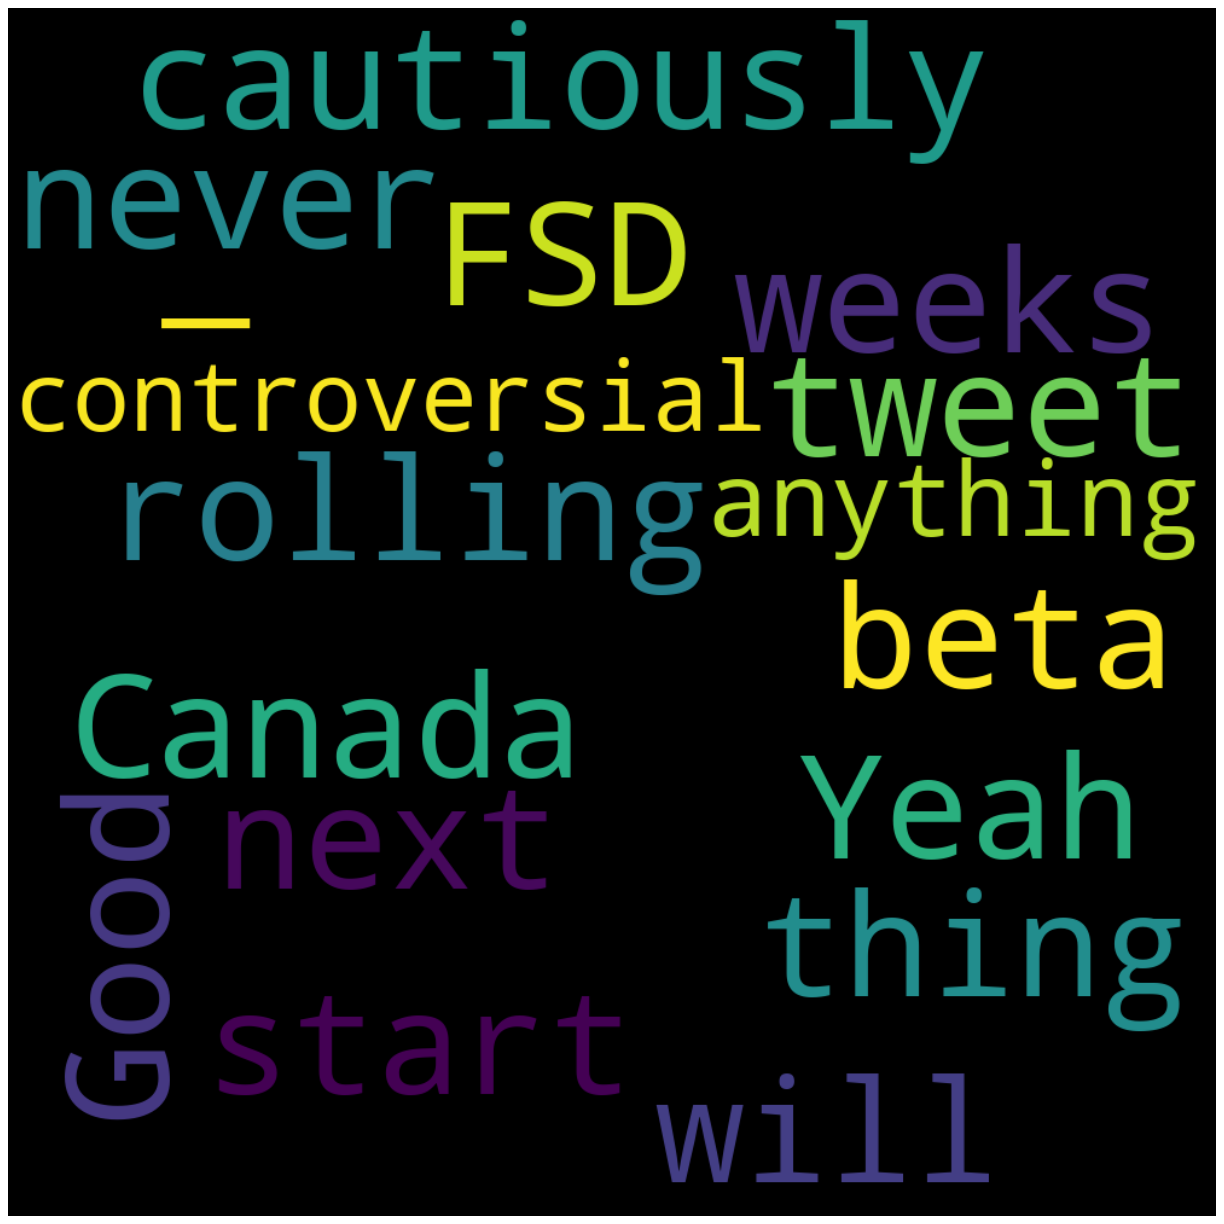

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df["tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [13]:
from textblob import TextBlob


def analysis(ds):
    analysis = TextBlob(ds["tweet"]).analysis
    return pd.Series([analysis.subjectivity, analysis.polarity])


df[["subjectivity", "polarity"]] = df.apply(analysis, axis=1)

df

AttributeError: 'TextBlob' object has no attribute 'analysis'

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Community analysis") 
plt.xlabel("Outside row freq")
plt.ylabel("Measure")
plt.show() 

In [ ]:
def analysis(score):
    if score < 0:
        return "outside community"
    elif score == 0:
        return "out of context"
    else:
        return "Inside community"
    

df["analysis"] = df["polarity"].apply(analysis)

df